# Preeliminares

Vamos a asumir que nunca han usado ni saben de Python, en ese caso los pasos en R (desde RStudio o cualquier IDE) serían:
### Instalar reticulate, tensorflow y keras, haciendo: 
install.packages('reticulate')  
install.packages('tensorflow')  
install.packages('keras')  
### Cargar los paquetes
library('reticulate')  
library('tensorflow')  
library('keras')
### Instalar Tensorflow
Dar install_tensorflow()  
Si detecta que no hay Python, R va a pedir autorización para instalar la distribución minicona  
Este proceso demora un poco
### Instalar keras
install_keras()  
Este proceso demora un poco



# Let's Code!
## Instalar y cargar paquetes

In [1]:
# Si no tengo el paquete reticulate, instálalo
if (!require('reticulate')) install.packages('reticulate')
# Cargar paquete 
library('reticulate')

Loading required package: reticulate



In [3]:
# Ver la ocnfiguración de Python en la computadora (asegurarnos que tenemos python)
py_config()

python:         /usr/local/share/.virtualenvs/r-reticulate/bin/python
libpython:      /usr/lib/python3.7/config-3.7m-x86_64-linux-gnu/libpython3.7.so
pythonhome:     //usr://usr
version:        3.7.3 (default, Dec 20 2019, 18:57:59)  [GCC 8.3.0]
numpy:          /usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/numpy
numpy_version:  1.18.4

python versions found: 
 /usr/local/share/.virtualenvs/r-reticulate/bin/python
 /usr/bin/python3
 /usr/bin/python

In [4]:
# Si no tengo el paquete tensorflow, instálalo
if (!require('tensorflow')) install.packages('tensorflow')
# Cargar paquete 
library('tensorflow')

Loading required package: tensorflow



In [5]:
# Ver configuración de Tensorflow
tf_config() 

TensorFlow v1.15.0 ()
Python v3.7 (/usr/local/share/.virtualenvs/r-reticulate/bin/python)

In [8]:
# Si no tengo el paquete tensorflow, instálalo
if (!require('keras')) install.packages('keras')
# Cargar paquete 
library('keras')

Loading required package: keras



In [9]:
# Ver si tenemos keras instalado
is_keras_available()

[1] TRUE

In [10]:
# cargar paquete
library( tidyverse) # Para manipulación de datos

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   0.8.5     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Importar los Datos

Importaremos la data a objetos de tipo data frame

In [11]:
## Importar la data
mnist_train <- read_csv("../input/digit-recognizer/train.csv")
mnist_test <- read_csv("../input/digit-recognizer/test.csv")

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



## Entender la data

Luego de importar, debemos centrarnos en entender la data que se tiene (esto habiendo ya entendido el problema o proyecto que se está analizando).  
Entonces, recordemos que cada fila representa la imagen en blanco y negro de un número escrito a mano; cada columna corresponde a un pixel y los valores de cada celda representa la luminosidad de la imagen y toma valores de 0 a 255.  
Además hay que recalcar que el objetivo es construir un modelo al que se le ingrese una imagen y este nos diga qué número está escrito en dicha imagen.  
  
Ahora vamos a listar las variables que tenemos junto con el tipo de dato de cada una, esto nos permite evaluar si necesitamos cambiar los tipos de datos.  
Nótese que tenemos dos datos:  
**_Train_**: Conjunto de datos que tiene los valores de la imagen junto con el número al que corresponde dicha imagen,  
**_Test_**: Conjunto de datos que tiene los valores de la imagen, pero SIN saber el valor que que representa esta imagen. Eso es así debido a que la idea es que uds envíen sus resultados a kaggle y ellos les digan cuán acertado es su modelo (y para ello uds no deberían saber la respuesta).



In [12]:
## Explorar Data
## Glimpse permite tener un listado de las variables,  
## junto con el tipo de datos y los primeros valores
glimpse(mnist_train)

Rows: 42,000
Columns: 785
$ label    <dbl> 1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, …
$ pixel0   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel1   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel2   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel3   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel4   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel5   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel6   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel7   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel8   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel9   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel10  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel11  <dbl> 0, 0, 0, 

In [13]:
## Explorar la data
## ver las primeras filas
head(mnist_train)

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
## Explorar Data
## Glimpse permite tener un listado de las variables,  
## junto con el tipo de datos y los primeros valores
glimpse(mnist_test)

Rows: 28,000
Columns: 784
$ pixel0   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel1   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel2   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel3   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel4   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel5   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel6   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel7   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel8   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel9   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel10  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel11  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel12  <dbl> 0, 0, 0, 

In [15]:
## Explorar la data
## ver las primeras filas
head(mnist_test)

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Manipular y Explorar la Data

Para modelar usaremos una red neuronal de tipo convolucional, para esto necesitamos que nuestra data de entrenamiento TRAIN esté separada en "x" y "y".

In [17]:
## Separar la data en x,y
df_x_train <- mnist_train %>% select(-label)
df_y_train <- mnist_train %>% select(label)
df_x_test <- mnist_test

In [18]:
## Sólo para ver que efectivamente se hizo
dim(mnist_train)
dim(df_x_train)

[1] 42000   785

[1] 42000   784

### Explorar

Para explorar vamos a reconstruir la imagen poniéndole como label el valor real**

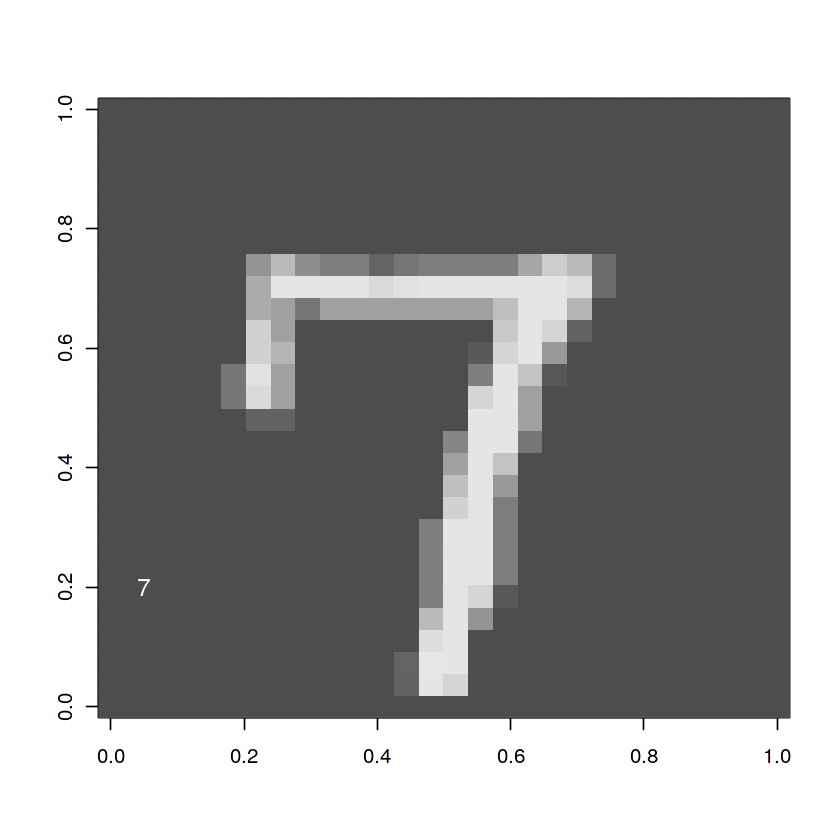

In [19]:
## Grafiquemos una de nuestras imagenes
m <- matrix( unlist(df_x_train[7,]), nrow=28, byrow=TRUE)
rotate <- function(x) t(apply(x, 2, rev))
image( rotate(m), col=grey.colors(255))
    text(0.05, 0.2, col="white", cex=1.2, df_y_train[7, 1])

In [20]:
# Ahora hagamos una función que permita graficar en grupo

graficaImagen <- function(rango){
  param_orig <- par(no.readonly=TRUE)
  # dimension del recuadro
  dim_rec <- ceiling(sqrt(length(rango)))
  par(mfrow=c(dim_rec, dim_rec), mar=c(.1, .1, .1, .1))
  
  for (i in rango){ #reverse and transpose each matrix to rotate images
    m <- matrix(unlist(df_x_train[i,]), nrow=28, byrow=TRUE)
    m <- apply(m, 2, rev)
    image(z= t(m), col=grey.colors(255), axes=FALSE)
    text(0.05, 0.2, col="white", cex=1.2, df_y_train[i, 1])
  }
  par(param_orig) #reset the original graphics parameters
}

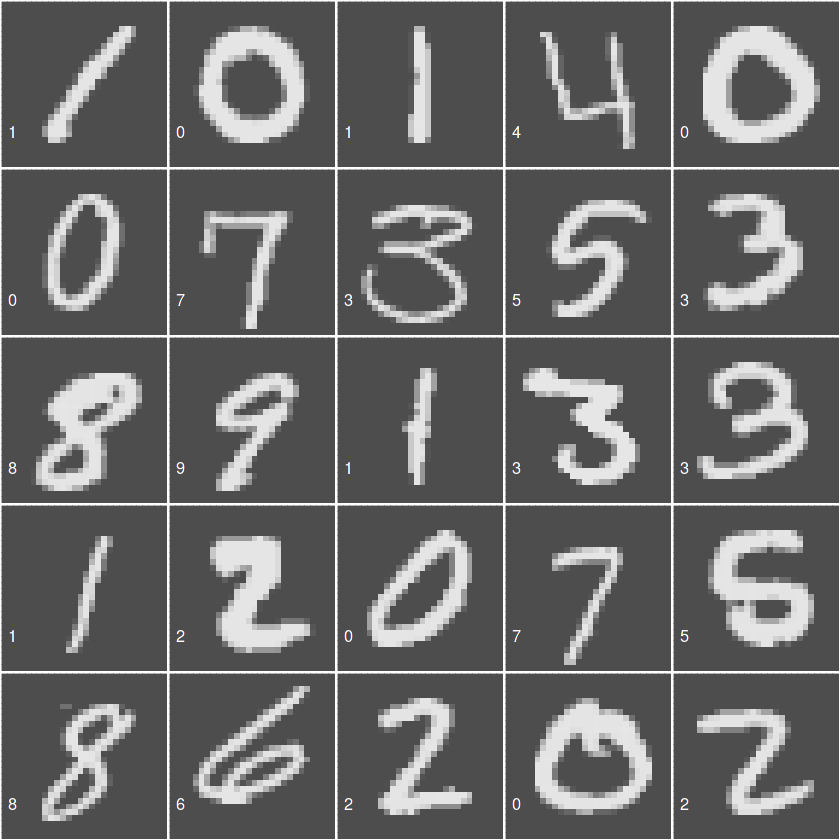

In [21]:
graficaImagen(1:25)


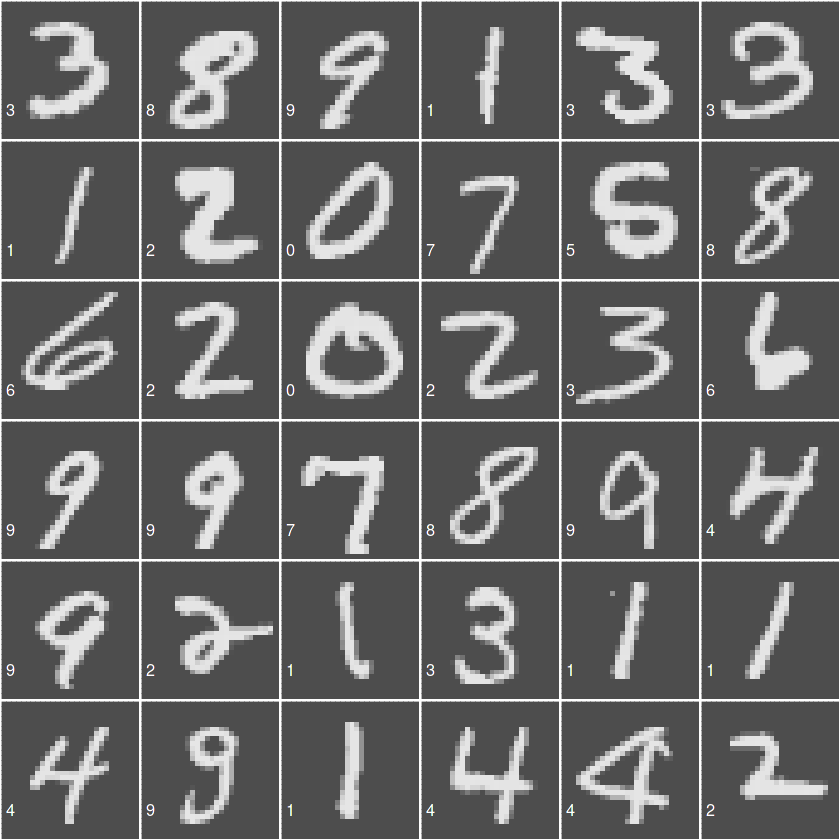

In [22]:
graficaImagen(10:45)


### Poner la data en la forma que lo requiere keras

Keras no recibe data.frames, debemos pasar a matrices

In [31]:
# Keras solo recibe matrices
x_train <- data.matrix(df_x_train)
y_train <- data.matrix(df_y_train)
x_test <- data.matrix(df_x_test)



Además, el "y" de nuestra data de entrenamiento al ser una variable de varias categorías, debemos pasarla a una matriz donde cada columna represente un label (1, 2, ..., 9) y cada fila tiene 1 si ese es el label de la imagen y 0 si no. Este proceso se conoce como One Hot Encoding

In [32]:
# One hot encoding en el y_train
y_train <- to_categorical(y_train, 10)

In [33]:
# Ver la matriz y_train que resulta luego dle one hot encoding
head(y_train)


0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0


Para las redes neuronales se requiere que la data esté escalada, así que haremos que toda la data de los pixeles (los "x") esté en valores entre 0 y 1, esto lo hacemos dividiendo para 255.

In [34]:
# Transformar en rango de 0 a 1 
x_train <- x_train/255
x_test <- x_test/255

In [38]:
head(x_train)

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Finalmente, transformamos cada fila a un array 28 x 28 (que son los pixeles) x 1; nuestro train es un objeto que contiene 784 (antes filas) arrays de 28 x 28 x 1

In [39]:
# Redimensionar
x_train <- array_reshape( x_train, c(nrow(x_train), 28, 28, 1) )
x_test <- array_reshape( x_test, c(nrow(x_test), 28, 28, 1) )

## Modelo de Red Neuronal

En keras, una de las formas para definir una red neuronal es usar un proceso secuencial, donde se van definiendo las capas de nuestra red.  
Primero se arma la arquitectura del modelo, luego se define parámetros de compilación como optimizador y función de pérdida y finlmente se manda a ajustar el modelo.

In [45]:
# Definir modelo: estructura de la red y optimizador
set.seed(123)
model_cnn <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = c(28, 28, 1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

In [46]:
## Ver la arquitectura armada
summary(model_cnn)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_2 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 24, 24, 64)              18496       
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 12, 12, 64)              0           
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 12, 12, 64)              0           
________________________________________________________________________________
flatten_1 (Flatten)                 (None, 9216)                    0           
________________________________________________________________________________
dense_

In [47]:
## Definir parametros de compilación
model_cnn %>% 
   compile(
    optimizer= optimizer_rmsprop(),
    loss='categorical_crossentropy',
    metrics='accuracy')

In [ ]:
# Aqui se ajusta el modelo
## Esto toma su tiempo
history <- model_cnn %>% fit(
  x_train, y_train, 
  epochs = 20, batch_size = 128, 
  validation_split = 0.2
)

In [ ]:
## Graficar la función de pérdida tanto en el train como en la validación 
plot(history)

In [ ]:
# Evaluar el modelo
model_cnn %>% evaluate(x_train, y_train)

### Ahora veamos los resultados en el test

En el train podemos tener problemas de sobreajuste y otros más, así que veamos que tal le va al modelo en el test; pero como no tenemos los valores reales, vamos a verlo gráficamente; entonces con el modelo ajustado vamos a predecir sobre la data test y luego vamos a graficar la imagen junto con le valor predicho.

In [ ]:
## Predecir en el test
y_pred <- model_cnn %>% predict_classes(x_test)

In [ ]:
# El y_pred es un vector, podemos ver sus primeros elementos
y_pred[1:100]

In [ ]:
# Ahora hagamos una función que permita graficar el test

graficaTest <- function(rango){
  param_orig <- par(no.readonly=TRUE)
  # dimension del recuadro
  dim_rec <- ceiling(sqrt(length(rango)))
  par(mfrow=c(dim_rec, dim_rec), mar=c(.1, .1, .1, .1))
  
  for (i in rango){ #reverse and transpose each matrix to rotate images
    m <- matrix(unlist(df_x_test[i,]), nrow=28, byrow=TRUE)
    m <- apply(m, 2, rev)
    image(z= t(m), col=grey.colors(255), axes=FALSE)
    text(0.05, 0.2, col="white", cex=1.2, y_pred[i])
  }
  par(param_orig) #reset the original graphics parameters
}

In [ ]:
graficaTest(1:49)
